In [76]:
%matplotlib inline
%config IPCompleter.greedy=True
from lesanalysis import *

In [77]:
# data
label = ['32x32x64x545', '64x64x64x546', '128x128x64x548', '256x256x64x550']
nxyz = np.array([32*32*64, 64*64*64, 128*128*64, 256*256*64])
nt = np.array([545, 546, 548, 550])
ng = nt*nxyz
time_O0_total_cpu = np.array([181.127, 730.247,  2950.713,  12302.126])
time_O0_total_gpu = np.array([21.242,  61.382,   212.016,   820.128])
time_O0_fstat_cpu = np.array([6.822,   27.041,   110.795,   440.315])
time_O0_fstat_gpu = np.array([6.844,   27.095,   109.615,   438.060])
time_O0_init_cpu  = np.array([0.102,   0.296,    1.036,     4.314])
time_O0_init_gpu  = np.array([1.089,   0.955,    1.517,     3.979])
time_O0_pres_cpu  = np.array([20.600,  81.840,   349.405,   1914.722])
time_O0_pres_gpu  = np.array([5.500,   15.564,   42.713,    148.504])

time_O3_total_cpu = np.array([71.443,  285.616,  1125.463,  4779.503])
time_O3_total_gpu = np.array([14.470,  38.582,   125.907,   489.314])
time_O3_fstat_cpu = np.array([1.904,   7.386,    30.696,    123.673])
time_O3_fstat_gpu = np.array([1.942,   7.374,    29.976,    121.511])
time_O3_init_cpu  = np.array([0.047,   0.160,    0.497,     2.026])
time_O3_init_gpu  = np.array([0.697,   0.798,    1.131,     2.467])
time_O3_pres_cpu  = np.array([7.401,   29.515,   123.759,   650.006])
time_O3_pres_gpu  = np.array([4.355,   13.791,   39.327,    138.265])

In [78]:
speedup_O0 = time_O0_total_cpu/time_O0_total_gpu
speedup_O0_exc_fstat = (time_O0_total_cpu-time_O0_fstat_cpu)/(time_O0_total_gpu-time_O0_fstat_gpu)
speedup_O3 = time_O3_total_cpu/time_O3_total_gpu
speedup_O3_exc_fstat = (time_O3_total_cpu-time_O3_fstat_cpu)/(time_O3_total_gpu-time_O3_fstat_gpu)

In [79]:
print(speedup_O0)
print(speedup_O0_exc_fstat)
print(speedup_O3)
print(speedup_O3_exc_fstat)

[ 8.52683363 11.89676127 13.91740718 15.00025118]
[12.1061953  20.5094059  27.73330339 31.04633468]
[4.93731859 7.40283034 8.93884375 9.76776262]
[ 5.55068646  8.91534222 11.41202531 12.65848838]


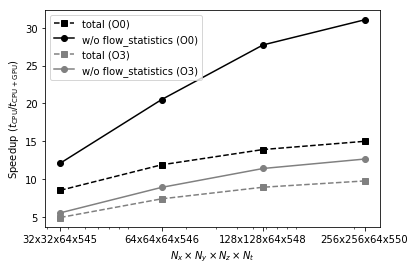

In [81]:
fig = plt.figure(figsize=[6,4])
plt.plot(ng, speedup_O0, '--ks', label='total (O0)')
plt.plot(ng, speedup_O0_exc_fstat, '-ko', label='w/o flow_statistics (O0)')
plt.plot(ng, speedup_O3, '--s', color='gray', label='total (O3)')
plt.plot(ng, speedup_O3_exc_fstat, '-o', color='gray', label='w/o flow_statistics (O3)')
plt.xscale('log')
plt.xticks(ng, label)
plt.xlabel('$N_x \\times N_y \\times N_z \\times N_t$')
plt.ylabel('Speedup ($t_\mathrm{CPU}/t_\mathrm{CPU+GPU}$)')
plt.legend()
figname = '/Users/qingli/work/superPrameterization/Speedup.pdf'
fig.savefig(figname, dpi = 300)